In [1]:
# Install TensorFlow
!pip install tensorflow-gpu

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 39.9MB/s 
     |████████████████████████████████| 450kB 74.1MB/s 
     |████████████████████████████████| 81kB 14.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exis

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1
/device:GPU:0
Num GPUs Available:  1


In [2]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
__________________________________________________

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.5149 - accuracy: 0.8121 - val_loss: 0.4226 - val_accuracy: 0.8425
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3957 - accuracy: 0.8557 - val_loss: 0.3846 - val_accuracy: 0.8597
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3604 - accuracy: 0.8668 - val_loss: 0.3730 - val_accuracy: 0.8635
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3450 - accuracy: 0.8721 - val_loss: 0.3712 - val_accuracy: 0.8658
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3281 - accuracy: 0.8782 - val_loss: 0.3585 - val_accuracy: 0.8736
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3155 - accuracy: 0.8815 - val_loss: 0.3384 - val_accuracy: 0.8764
Epoch 7/10
60000/60000 [==============================]

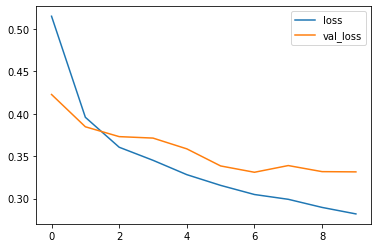

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

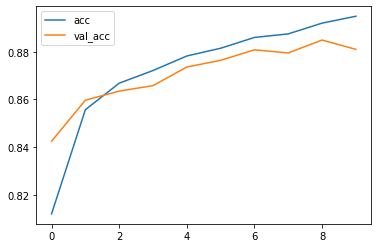

In [8]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3314 - accuracy: 0.8810
[0.33139690086841583, 0.881]


Confusion matrix, without normalization
[[845   2  24  33   3   0  86   0   7   0]
 [  3 967   2  22   4   0   1   0   1   0]
 [ 15   1 848   8  97   0  30   0   1   0]
 [ 23   3  18 894  35   0  21   0   6   0]
 [  0   0 128  29 815   0  25   0   3   0]
 [  0   0   0   1   0 946   0  37   1  15]
 [140   0 140  30  89   0 593   0   8   0]
 [  0   0   0   0   0   3   0 975   0  22]
 [  1   0   4   5   3   2   4   4 977   0]
 [  1   0   0   1   0   8   0  40   0 950]]


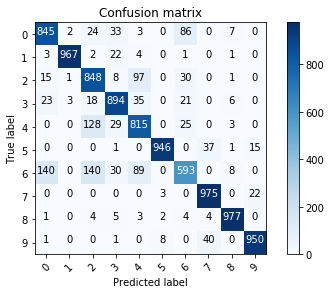

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

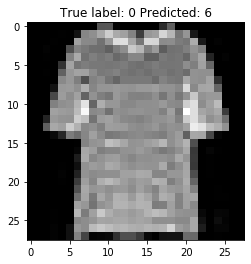

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));